*Class 4*

**Imports**

In [34]:
import pandas as pd
import plotly.express as maria # You can give the imported package any name you choose. Most of the times you see that that some logical name is chosen, like px for plotly.express
from pandas.plotting import scatter_matrix
from pandas.api.types import CategoricalDtype
from IPython.display import display, Markdown
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

In [ ]:
url = "https://raw.githubusercontent.com/businessdatasolutions/courses/main/datamining-n/datasets/smsspam.csv"
rawDF = pd.read_csv(url)
rawDF.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
catType = CategoricalDtype(categories=["ham", "spam"], ordered=False)
rawDF.type = rawDF.type.astype(catType)
rawDF.type

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: type, Length: 5572, dtype: category
Categories (2, object): ['ham', 'spam']

In [6]:
rawDF.type.value_counts()

type
ham     4825
spam     747
Name: count, dtype: int64

In [7]:
rawDF.type.value_counts(normalize=True)

type
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

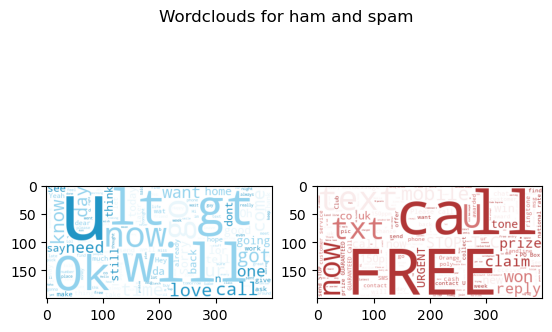

In [20]:
# Generate a word cloud image]
hamText = ' '.join([Text for Text in rawDF[rawDF['type']=='ham']['text']])
spamText = ' '.join([Text for Text in rawDF[rawDF['type']=='spam']['text']])
colorListHam=['#e9f6fb','#92d2ed','#2195c5']
colorListSpam=['#f9ebeb','#d57676','#b03636']
colormapHam=colors.ListedColormap(colorListHam)
colormapSpam=colors.ListedColormap(colorListSpam)
wordcloudHam = WordCloud(background_color='white', colormap=colormapHam).generate(hamText)
wordcloudSpam = WordCloud(background_color='white', colormap=colormapSpam).generate(spamText)

# Display the generated image:
# the matplotlib way:
fig, (wc1, wc2) = plt.subplots(1, 2)
fig.suptitle('Wordclouds for ham and spam')
wc1.imshow(wordcloudHam)
wc2.imshow(wordcloudSpam)
plt.show()

In [23]:
vectorizer = TfidfVectorizer(max_features=1000)
vectors = vectorizer.fit_transform(rawDF.text)
wordsDF = pd.DataFrame(vectors.toarray(), columns=vectorizer.get_feature_names_out())
wordsDF.head()

,000,03,04,0800,08000839402,08000930705,10,100,1000,10p,...,yes,yesterday,yet,yo,you,your,yours,yourself,yr,yup
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
xTrain, xTest, yTrain, yTest = train_test_split(wordsDF, rawDF.type)

In [27]:
bayes = MultinomialNB()
bayes.fit(xTrain, yTrain)

MultinomialNB()

In [28]:
yPred = bayes.predict(xTest)
yTrue = yTest

In [32]:
accuracyScore = accuracy_score(yTrue, yPred)
print(f'Accuracy: {accuracyScore}')

Accuracy: 0.9827709978463748


In [33]:
matrix = confusion_matrix(yTrue, yPred)
labelNames = pd.Series(['ham', 'spam'])
pd.DataFrame(matrix,
     columns='Predicted ' + labelNames,
     index='Is ' + labelNames)

,Predicted ham,Predicted spam
Is ham,1211,2
Is spam,22,158
